In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.functional_models import AiryDisk2D

# Optics

Now, consider the folllowing four wavelength regimes:

- Radio (10m-1mm). Take a 40m telescope and lambda=1m, then $\theta=0.8^{\rm o}$.
- IR (30μm-450μm). Take a 6.5m telescope and lambda=10μm, then $\theta=0.4^{\rm "}$.
- Optical (300 nm - 1 μm). Take a 10m telescope and lambda=500μm, then $\theta=0.01^{\rm "}$.
- X-ray (0.12 nm - 4.1 nm). Take a 1 m telescope and lambda=1 nm, then $\theta=0.0002^{\rm "}$.

So, single dish radio telescopes have very poor resolution (we'll get to this next lecture), while X-ray imaging should have outstanding resolution. From our viewpoint on the Earth's atmosphere, we have access to a limited window, covering the optical window and the radiow window.

![Atmosphereic Absorption](Figures/Atmospheric_Transmission.png)

## Telescope Designs

So how do we design optical telescopes to maximise their effectiveness? There are three optical designs which telescopes follow: Prime focus, Newtonian, and Cassigrian. Each of them is capable of having active supporting units under their primary mirrors, which allows mirrors to keep their shape when at an angle to Earth's gravitational field.

![Optical Designs](Figures/Optics_Designs.png)

![Telescope Designs](Figures/Telescope_Designs.png)

In combination to the optical design, there is also the question of mount design. There are two primary designs: equatorial, and Altitude-Azimuth design (Alt-Az). For equatorial telescopes, one of the axe's is aligned parllel to the Earth's rotational axis. This means that when the telescope is point at a star, it then only requires movement around one axis in order to track stars. Very common for small, commerical telescopes, but for large telescopes, they require huge counterweights, and so becomes expensive The Hale telescope for example: https://sites.astro.caltech.edu/palomar/about/telescopes/hale.html. It's a 5m telescope, but requires a Dome which is 41 m tall and 42 m in diameter

![Equatorial Telescope](Figures/Hale_telescope.jpg)

Alt-Az telescopes are significantly more compact in design. One axis is perpendicular to the Zenith, the otheris parallel to it. As such, they require motion around 2 axes in order to track stars. See, for example, the VLT (https://www.eso.org/public/images/potw1036a/) These 10m telescope only need a dome with is 30 m tall and 28 m in diameter.

![AltAz Telescope](Figures/VLT.jpg)

## Optical

The human eye has a very low quantum efficiency (QE) of about 1% (this means around 1 in every 100 photons is actually detected). At optical wavelengths, we typically use CCDs, or charged-coupled devices, for observations. This is due to their very high quantum efficiency, meaning their response is nearly linear - that is, the number of counts you observe is directly proportional to the intensity of light.

They also have very high dynamic ranges - each pixel in a CCD is capable of registering up to ~65,000 counts accurately. Typically, CCD's are Si based. As a photon interacts with a given pixel, it causes excitation of an electron into a conduction band. When finished observing, the accumulation of charge within a pixel can be shifted to an adjacent pixel. As such, an image is read out pixel-by-pixel, as shown below.

![CCD](Figures/CCD.png)

Now, assume the number of photons reaching our detector over a fixed interval of time is $N$, but the arrival time of each photon is randomly distributed. The probability of detecting $k$ photons over a fixed time interval is then given by a Poisson distribution
$$
    P(k)=\frac{N^k e^{-N}}{k!}
$$

It is easy enough to show that for such a distribution, the standard deviation is given by $\sigma=\sqrt N$. For large N (>10), this becomes a Gaussian with $\sigma=\sqrt N$ (see below)

$$
    P(k)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(k-N)^2/2\sigma^2}
$$

As such, any process which involves a large number of events has an ideal error on it of $\sqrt N$ - this is called shot noise.

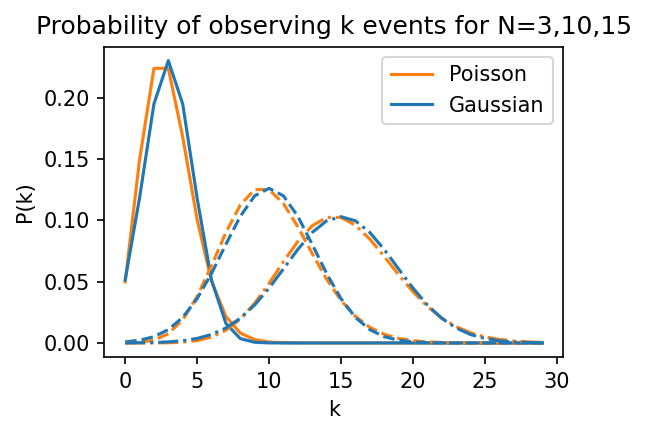

In [6]:
k = np.arange(0.0,30.0,1)

#For N = 3
N=3.0
P_k=[]
for k_i in k:
    P_k.append(N**k_i*np.exp(-N)/np.math.factorial(k_i)) # Poisson Distribution
G_k=1/np.sqrt(2*np.pi*N)*np.exp(-(k-N)**2/(2*N)) # Gaussian Distribution

plt.figure(figsize=[4,3],dpi=150)
plt.plot(k,P_k,'C1-',label='Poisson')
plt.plot(k,G_k,'C0-',label='Gaussian')

#For N = 10
N=10.0
P_k=[]
for k_i in k:
    P_k.append((N**k_i)*np.exp(-N)/np.math.factorial(k_i)) # Poisson Distribution
G_k=1/np.sqrt(2*np.pi*N)*np.exp(-(k-N)**2/(2*N)) # Gaussian Distribution

plt.plot(k,P_k,'C1--')
plt.plot(k,G_k,'C0--')

#For N = 15
N=15.0
P_k=[]
for k_i in k:
    P_k.append((N**k_i)*np.exp(-N)/np.math.factorial(k_i)) # Poisson Distribution
G_k=1/np.sqrt(2*np.pi*N)*np.exp(-(k-N)**2/(2*N)) # Gaussian Distribution

plt.plot(k,P_k,'C1-.')
plt.plot(k,G_k,'C0-.')
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Probability of observing k events for N=3,10,15")
plt.legend()
plt.tight_layout()
plt.savefig("Figures/Poisson_vs_Gaussian.jpg")
plt.show()